### Лабораторная работа №5: Линейная регрессия 
##### Выполнил студент группы: 6131-010402D Павлов Владислав

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as pltx

from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

from warnings import filterwarnings
filterwarnings("ignore")

### 1. Загрузка датасета

In [2]:
df = pd.read_csv("dubai_properties.csv")

### 2. Датасет и подготовка данных
#### 2.1 Описание датасета

#### Датасет содержит данные об арендуемой недвижимости в Дубае
#### Цель - прогнозирование тенденций на рынке аренды

| Признак | Описание | Единицы измерения | Тип данных |
|:-------:|:--------:|:-----------------:|:----------:|
| Address | Полный адрес объекта недвижимости | address | categorical |
| Rent | Годовая стоимость аренды | Dirhams | numerical |
| Beds | Количество спален в доме | pc | numerical |
| Baths | Количество ванных комнат в доме| pc | numerical |
| Type | Тип недвижимости | apartament, villa, penthouse | categorical |
| Area_in_sqft | Общая площадь объекта | foot^2 | numerical |  
| Rent_per_sqft | Арендная плата за квадратный фут| Dirham/foot^2 | numerical |
| Rent_category | Классификация арендной платы по категориям| Low, Medium, High | categorical |
| Frequency | Периодичность внесения арендной платы | Yearly | categorical |
| Furnishing | Состояние меблировки объекта | Furnised, Unfurnised | categorical |
| Purpose | Цель объявления, как правило | For rent | categorical |
| Posted_date | Дата, когда недвижимость была сдана в аренду | yyyy.mm.dd | categorical |
| Age_of_listing_in_days | Количество дней, в течение которых объявление было активно с момента его публикации | numbers day | numerical |
| Location | Более конкретное местоположение в пределах города, где находится недвижимость | specific_location | categorical |
| City | Город, в котором находится недвижимость | city | categorical |
| Latitude, Longitude | Географические координаты объекта недвижимости | Latitude, Longitude | numerical |



In [3]:
df.head()

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Address                 73742 non-null  object 
 1   Rent                    73742 non-null  int64  
 2   Beds                    73742 non-null  int64  
 3   Baths                   73742 non-null  int64  
 4   Type                    73742 non-null  object 
 5   Area_in_sqft            73742 non-null  int64  
 6   Rent_per_sqft           73742 non-null  float64
 7   Rent_category           73742 non-null  object 
 8   Frequency               73742 non-null  object 
 9   Furnishing              73742 non-null  object 
 10  Purpose                 73742 non-null  object 
 11  Posted_date             73742 non-null  object 
 12  Age_of_listing_in_days  73742 non-null  int64  
 13  Location                73742 non-null  object 
 14  City                    73742 non-null

### 2.2 Предобработка данных 

In [5]:
# проверка на NAN
df.isna().sum()

Address                     0
Rent                        0
Beds                        0
Baths                       0
Type                        0
Area_in_sqft                0
Rent_per_sqft               0
Rent_category               0
Frequency                   0
Furnishing                  0
Purpose                     0
Posted_date                 0
Age_of_listing_in_days      0
Location                    0
City                        0
Latitude                  719
Longitude                 719
dtype: int64

In [6]:
df.dropna(axis = 0, inplace=True)

In [7]:
# проверка на NAN
df.isna().sum()

Address                   0
Rent                      0
Beds                      0
Baths                     0
Type                      0
Area_in_sqft              0
Rent_per_sqft             0
Rent_category             0
Frequency                 0
Furnishing                0
Purpose                   0
Posted_date               0
Age_of_listing_in_days    0
Location                  0
City                      0
Latitude                  0
Longitude                 0
dtype: int64

In [8]:
droped_features = ["Address","Type", "Rent_category", "Frequency","Furnishing","Purpose","Posted_date", "Location", "City", ]
df_droped = df.drop(columns= droped_features, axis = 1)
df_droped.head()

,Rent,Beds,Baths,Area_in_sqft,Rent_per_sqft,Age_of_listing_in_days,Latitude,Longitude
0,124000,3,4,1785,69.467787,45,24.493598,54.407841
1,140000,3,4,1422,98.452883,44,24.494022,54.607372
2,99000,2,3,1314,75.342466,31,24.485931,54.600939
3,220000,3,4,3843,57.246942,57,24.493598,54.407841
4,350000,5,7,6860,51.020408,65,24.494022,54.607372


### 2.3 Нормализация данных

In [9]:
x = df_droped.drop("Rent", axis = 1)
y = df_droped["Rent"]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled_df = pd.DataFrame(x_scaled, columns = x.columns)

### 2.4 Визуализировать heatmap

<Axes: >

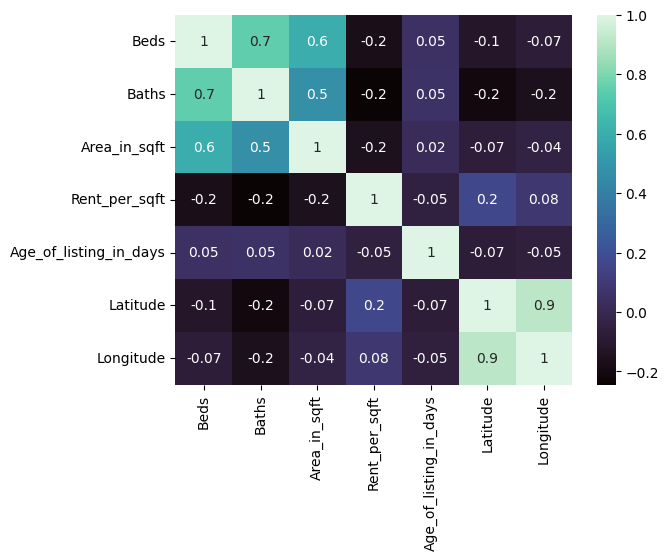

In [10]:
heat_matrix = x_scaled_df.corr()
sns.heatmap(heat_matrix, cmap="mako", annot= True, fmt='.1g') 

### 2.5 Визуализировать взаимосвязь между target-переменной и каждым из признаком

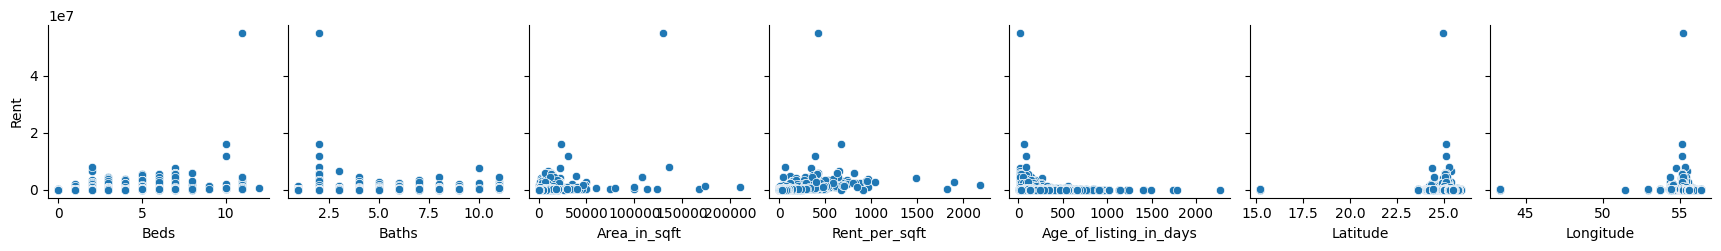

In [11]:
sns.pairplot(df_droped,y_vars=["Rent"], x_vars= x.columns, height=2.5)

### 2.6 Разделение выборки на обучающую и тестовую

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state= 42)

### 3. Регрессия МНК
#### 3.1 Обучить модель линейной регрессии (LinearRegression)

In [13]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)
model_lr_pred_train = model_lr.predict(x_train)
model_lr_pred_test = model_lr.predict(x_test)

### 3.2 Вывести метрики MAE, MSE и R^2 на обущающем и тестовом наборе.

In [14]:
def print_metrics(x_type, y_type, model):
    model_predict = model.predict(x_type) 
    mae = mean_absolute_error(y_type, model_predict)
    mse = mean_squared_error(y_type, model_predict)
    r_two = r2_score(y_type, model_predict)
    return mae, mse, r_two 

In [15]:
mae_train, mse_train, r_two_train = print_metrics(x_train, y_train, model_lr)
mae_test, mse_test, r_two_test = print_metrics(x_test, y_test, model_lr)

print("Метрики для обучающей выборки:")
print(f"MAE: {mae_train}; MSE: {mse_train}; R2: {r_two_train}")

print("Метрики для тестовой выборки:")
print(f"MAE: {mae_test}; MSE: {mse_test}; R2: {r_two_test}")

Метрики для обучающей выборки:
MAE: 64680.79239393957; MSE: 68369698138.33682; R2: 0.3666246948380776
Метрики для тестовой выборки:
MAE: 65360.1873335756; MSE: 35246085293.588936; R2: 0.4567581393703162


### 3.3 Вывести model.coef_ и model.intercept_

In [16]:
model_lr.coef_

array([ 5.83195733e+04, -4.99577453e+04,  4.76666797e+01,  1.88385087e+03,
        4.78305155e+01, -1.80850520e+03, -1.18521738e+04])

In [17]:
model_lr.intercept_

584384.2319558283

### 3.4 Построить график (barh) с важностью коэфициентов при соответствующих признаках.

In [18]:
coefs = []
names = []
z = zip(model_lr.coef_, x.columns)
z = sorted(z, key=lambda x: x[0])
for c, n in z:
    coefs.append(c)
    names.append(n)

([<matplotlib.axis.YTick at 0x1bcd2d32f50>,
 [Text(0, 0, 'Baths'),
  Text(0, 1, 'Longitude'),
  Text(0, 2, 'Latitude'),
  Text(0, 3, 'Area_in_sqft'),
  Text(0, 4, 'Age_of_listing_in_days'),
  Text(0, 5, 'Rent_per_sqft'),
  Text(0, 6, 'Beds')])

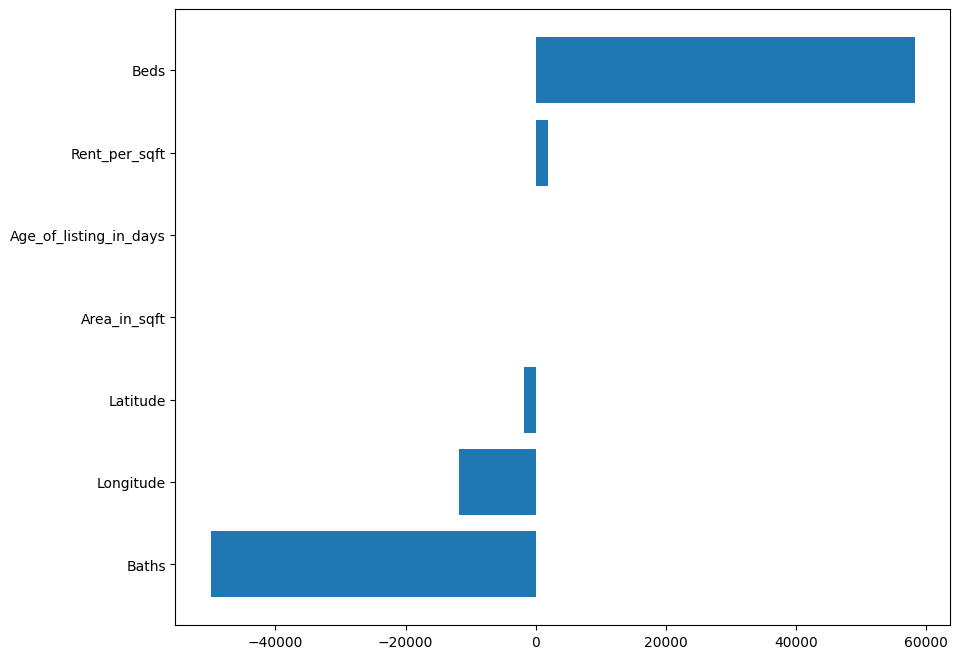

In [19]:
plt.figure(figsize=(10,8))
plt.barh(range(len(model_lr.coef_)), coefs, align='center')
plt.yticks(range(len(model_lr.coef_)), names)

### 4 Для каждого вида регрессии (Ridge, Lasso, Elastic Net):
#### 4.1 С использованием GridSearchCV осуществить подбор параметров регуляризации (alpha для Ridge и LASSO, alpha и l1_ratio для Elastic Net)

### Lasso

In [20]:
lasso = Lasso()

parameters = {"alpha": np.arange(0.1, 151, 0.1)}
lasso_grid_search = GridSearchCV(lasso, parameters, refit= True, n_jobs= -1, verbose = 2)
lasso_grid_search.fit(x_train, y_train)
print(f"Лучшие параметры для Lasso Regression: {lasso_grid_search.best_params_}")

Fitting 5 folds for each of 1509 candidates, totalling 7545 fits
Лучшие параметры для Lasso Regression: {'alpha': 0.1}


In [21]:
lasso_regression = Lasso(alpha= 0.1)
lasso_regression.fit(x_train, y_train)

lasso_mae_test, lasso_mse_test, lasso_r_two_test = print_metrics(x_test, y_test, lasso_regression)

print("Метрики Lasso для тестовой выборки:")
print(f"MAE: {lasso_mae_test}; MSE: {lasso_mse_test}; R2: {lasso_r_two_test}")

Метрики Lasso для тестовой выборки:
MAE: 65360.13013036574; MSE: 35246090098.96496; R2: 0.4567580653058806


In [22]:
print(f"model.coef_ = {lasso_regression.coef_} \n")
print(f"model.intercept = {lasso_regression.intercept_}")

model.coef_ = [ 5.83193854e+04 -4.99575593e+04  4.76666968e+01  1.88385077e+03
  4.78306818e+01 -1.80806165e+03 -1.18522565e+04] 

model.intercept = 584377.6100439881


([<matplotlib.axis.YTick at 0x1bcd3232e00>,
 [Text(0, 0, 'Baths'),
  Text(0, 1, 'Longitude'),
  Text(0, 2, 'Latitude'),
  Text(0, 3, 'Area_in_sqft'),
  Text(0, 4, 'Age_of_listing_in_days'),
  Text(0, 5, 'Rent_per_sqft'),
  Text(0, 6, 'Beds')])

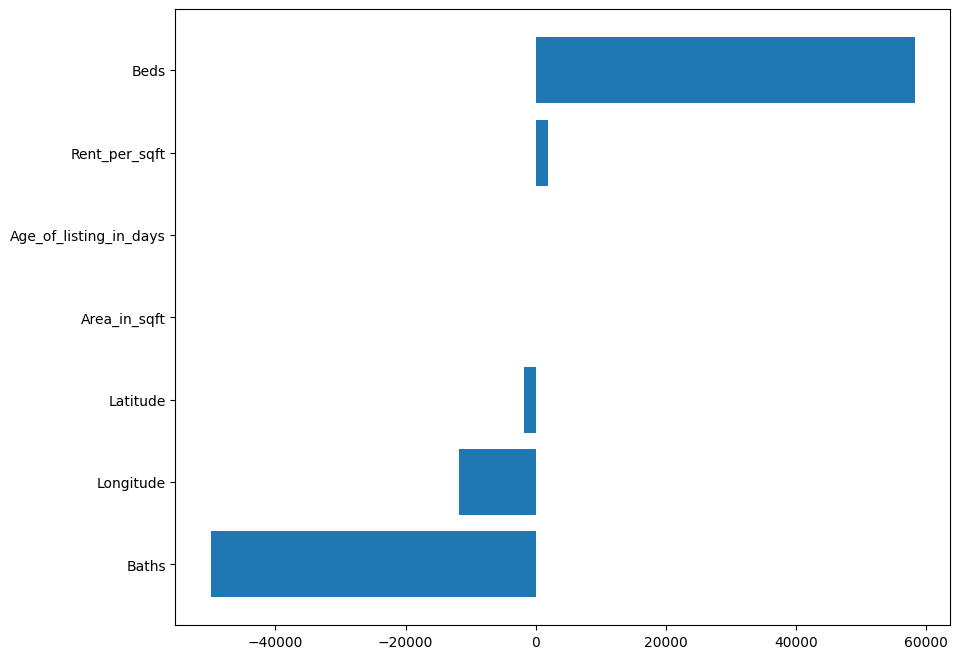

In [23]:
coefs_lasso = []
names_lasso = []
zz = zip(lasso_regression.coef_, x.columns)
zz = sorted(zz, key=lambda x: x[0])
for c, n in zz:
    coefs_lasso.append(c)
    names_lasso.append(n)

plt.figure(figsize=(10,8))
plt.barh(range(len(lasso_regression.coef_)), coefs_lasso, align='center')
plt.yticks(range(len(lasso_regression.coef_)), names_lasso)

### Ridge

In [24]:
ridge = Ridge()

parameters = {"alpha": np.arange(0.1, 151, 0.1)}
ridge_grid_search = GridSearchCV(ridge, parameters, refit= True, n_jobs= -1, verbose = 2)
ridge_grid_search.fit(x_train, y_train)
print(f"Лучшие параметры для Lasso Regression: {ridge_grid_search.best_params_}")

Fitting 5 folds for each of 1509 candidates, totalling 7545 fits
Лучшие параметры для Lasso Regression: {'alpha': 0.1}


In [25]:
ridge_regression = Ridge(alpha= 0.1)
ridge_regression.fit(x_train, y_train)

Ridge(alpha=0.1)

In [26]:
ridge_mae_test, ridge_mse_test, ridge_r_two_test = print_metrics(x_test, y_test, ridge_regression)

print("Метрики Ridge для тестовой выборки:")
print(f"MAE: {ridge_mae_test}; MSE: {ridge_mse_test}; R2: {ridge_r_two_test}")

Метрики Ridge для тестовой выборки:
MAE: 65360.133980601; MSE: 35246092026.24376; R2: 0.45675803560106343


In [27]:
print(f"model.coef_ = {ridge_regression.coef_} \n")
print(f"model.intercept = {ridge_regression.intercept_}")

model.coef_ = [ 5.83193724e+04 -4.99575780e+04  4.76667023e+01  1.88385134e+03
  4.78305303e+01 -1.80880223e+03 -1.18518518e+04] 

model.intercept = 584373.8091822482


([<matplotlib.axis.YTick at 0x1bcd2cb5ab0>,
 [Text(0, 0, 'Baths'),
  Text(0, 1, 'Longitude'),
  Text(0, 2, 'Latitude'),
  Text(0, 3, 'Area_in_sqft'),
  Text(0, 4, 'Age_of_listing_in_days'),
  Text(0, 5, 'Rent_per_sqft'),
  Text(0, 6, 'Beds')])

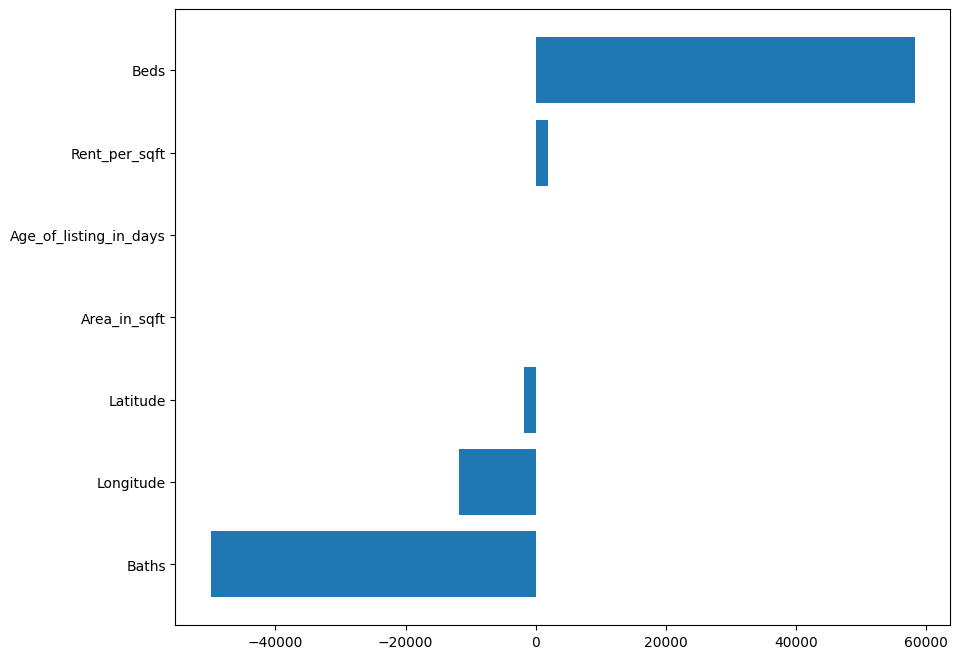

In [28]:
coefs_ridge = []
names_ridge = []
zz_ridge = zip(ridge_regression.coef_, x.columns)
zz_ridge = sorted(zz_ridge, key=lambda x: x[0])
for c, n in zz_ridge:
    coefs_ridge.append(c)
    names_ridge.append(n)

plt.figure(figsize=(10,8))
plt.barh(range(len(ridge_regression.coef_)), coefs_ridge, align='center')
plt.yticks(range(len(ridge_regression.coef_)), names_ridge)

### Elastic Net

In [29]:
el_net = ElasticNet()

el_net_parameters = {
    "alpha": np.arange(0.1, 1, 0.1), 
    "l1_ratio": np.arange(0.05, 1, 0.05)
}
el_net_grid_search = GridSearchCV(el_net, el_net_parameters, refit= True, n_jobs= -1, verbose = 2)
el_net_grid_search.fit(x_train, y_train)

print(f"Лучшие параметры для Lasso Regression: {el_net_grid_search.best_params_}")

Fitting 5 folds for each of 171 candidates, totalling 855 fits
Лучшие параметры для Lasso Regression: {'alpha': 0.1, 'l1_ratio': 0.9500000000000001}


In [30]:
el_net_regression = ElasticNet(alpha= 0.1, l1_ratio= 0.95)
el_net_regression.fit(x_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.95)

In [31]:
el_net_mae_test, el_net_mse_test, el_net_r_two_test = print_metrics(x_test, y_test, el_net_regression)

print("Метрики ElasticNet для тестовой выборки:")
print(f"MAE: {el_net_mae_test}; MSE: {el_net_mse_test}; R2: {el_net_r_two_test}")

Метрики ElasticNet для тестовой выборки:
MAE: 65225.83486069084; MSE: 35263259166.089355; R2: 0.4564934414223417


In [32]:
print(f"model.coef_ = {el_net_regression.coef_} \n")
print(f"model.intercept = {el_net_regression.intercept_}")

model.coef_ = [ 5.78117096e+04 -4.95329328e+04  4.77235142e+01  1.88497715e+03
  4.78832423e+01 -2.44435846e+03 -1.11351645e+04] 

model.intercept = 560509.6828414055


([<matplotlib.axis.YTick at 0x1bcd36ae140>,
 [Text(0, 0, 'Baths'),
  Text(0, 1, 'Longitude'),
  Text(0, 2, 'Latitude'),
  Text(0, 3, 'Area_in_sqft'),
  Text(0, 4, 'Age_of_listing_in_days'),
  Text(0, 5, 'Rent_per_sqft'),
  Text(0, 6, 'Beds')])

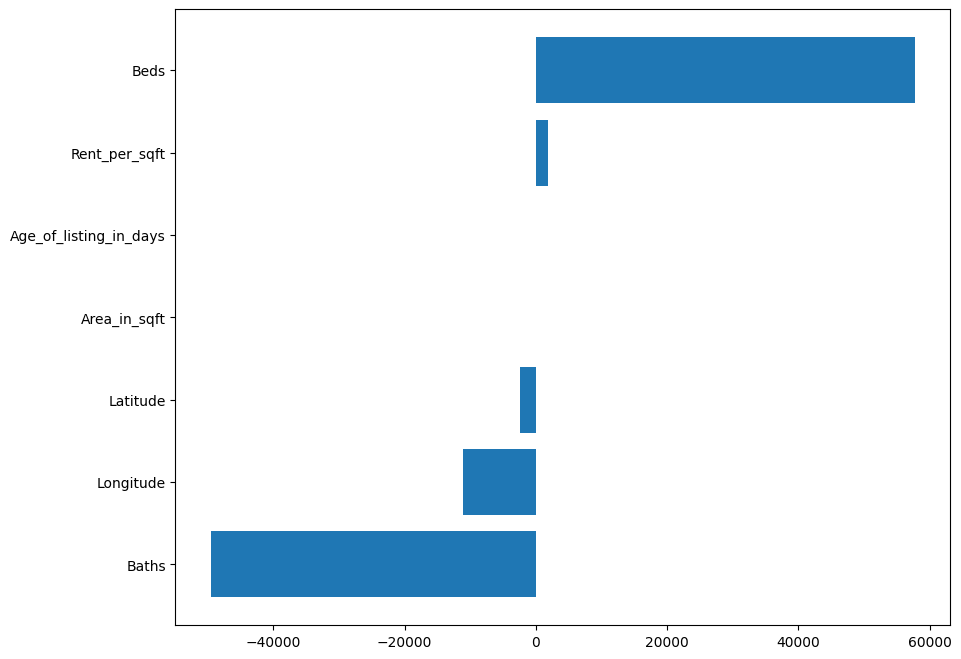

In [33]:
coefs_el_net = []
names_el_net = []
zz_el_net = zip(el_net_regression.coef_, x.columns)
zz_el_net = sorted(zz_el_net, key=lambda x: x[0])
for c, n in zz_el_net:
    coefs_el_net.append(c)
    names_el_net.append(n)

plt.figure(figsize=(10,8))
plt.barh(range(len(el_net_regression.coef_)), coefs_el_net, align='center')
plt.yticks(range(len(el_net_regression.coef_)), names_el_net)

### 5. Датасет и подготовка данных

### 5.1 Использовать датафрейм после разбиения на обучающую и тестовую выборки из 1 этапа с категориальными признаками

In [34]:
df.head()

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372


In [35]:
droped_features = ["Address","Frequency","Furnishing","Purpose","Posted_date"]
df_dropped = df.drop(columns= droped_features, axis = 1)
df_dropped.head()

,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,124000,3,4,Apartment,1785,69.467787,Medium,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,140000,3,4,Apartment,1422,98.452883,Medium,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,99000,2,3,Apartment,1314,75.342466,Medium,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,220000,3,4,Penthouse,3843,57.246942,High,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,350000,5,7,Villa,6860,51.020408,High,65,Yas Island,Abu Dhabi,24.494022,54.607372


### 5.2 Кодирование категориальных признаков

In [36]:
columns_to_map = ["Type", "Rent_category", "Location","City"]  # Список столбцов, которые надо преобразовать

for column in columns_to_map:
    unique_values = df_dropped[column].unique()
    mapping = {val: idx for idx, val in enumerate(unique_values)}
    df_dropped[column] = df_dropped[column].replace(mapping)

df_dropped.head()


,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,124000,3,4,0,1785,69.467787,0,45,0,0,24.493598,54.407841
1,140000,3,4,0,1422,98.452883,0,44,1,0,24.494022,54.607372
2,99000,2,3,0,1314,75.342466,0,31,2,0,24.485931,54.600939
3,220000,3,4,1,3843,57.246942,1,57,0,0,24.493598,54.407841
4,350000,5,7,2,6860,51.020408,1,65,1,0,24.494022,54.607372


In [37]:
x_1 = df_dropped.drop("Rent", axis = 1)
y_1 = df_dropped["Rent"]

scalerr = StandardScaler()
x_scaleds = scalerr.fit_transform(x_1)
x_scaleds_df = pd.DataFrame(x_scaleds, columns = x_1.columns)

In [38]:
x_trains, x_tests, y_trains, y_tests = train_test_split(x_1,y_1, test_size= 0.3, random_state= 42)

### 6. Регрессии, этап 2:

### 6.1 Обучить LinearRegression, лучшие модели Ridge, LASSO, Elastic Net на обучающем наборе с категориальными признаками. 

In [39]:
linear = LinearRegression()
k_linear = LinearRegression()
k_linear.fit(x_trains, y_trains)
linear.fit(x_train, y_train)

k_ridge = Ridge(alpha= 0.1)
k_ridge.fit(x_trains, y_trains)

k_lasso = Lasso(alpha= 0.1)
k_lasso.fit(x_trains, y_trains)

k_el_net = ElasticNet(alpha= 0.1, l1_ratio= 0.95)
k_el_net.fit(x_trains, y_trains)

ElasticNet(alpha=0.1, l1_ratio=0.95)

### 6.2 Вывести значения гиперпараметров, коэффициенты регрессии (model.coef_ и model.intercept_) и значения метрик на тестовом наборе MSE, MAE, R^2

In [40]:
linear_mae_test, linear_mse_test, linear_r_two_test = print_metrics(x_test, y_test, linear)
k_linear_mae_test, k_linear_mse_test, k_linear_r_two_test = print_metrics(x_tests, y_tests, k_linear)
k_lasso_mae_test, k_lasso_mse_test, k_lasso_r_two_test = print_metrics(x_tests, y_tests, k_lasso)
k_ridge_mae_test, k_ridge_mse_test, k_ridge_r_two_test = print_metrics(x_tests, y_tests, k_ridge)
k_el_net_mae_test, k_el_net_mse_test, k_el_net_r_two_test = print_metrics(x_tests, y_tests, k_el_net)


print("Метрики Линейной регресии(only_num) для тестовой выборки: \n")
print(f"MAE: {linear_mae_test};\n MSE: {linear_mse_test}; \n R2: {linear_r_two_test} \n ")
print(f"model.coef_: {linear.coef_}; \n model.intercept_: {linear.intercept_} \n")

print("Метрики Линейной регресии(all) для тестовой выборки: \n")
print(f"MAE: {k_linear_mae_test};\n MSE: {k_linear_mse_test}; \n R2: {k_linear_r_two_test} \n ")
print(f"model.coef_: {k_linear.coef_}; \n model.intercept_: {k_linear.intercept_} \n")

print("Метрики Lasso для тестовой выборки: \n")
print(f"MAE: {k_lasso_mae_test};\n MSE: {k_lasso_mse_test}; \n R2: {k_lasso_r_two_test} \n ")
print(f"model.coef_: {k_lasso.coef_}; \n model.intercept_: {k_lasso.intercept_} \n")

print("Метрики Ridge для тестовой выборки: \n")
print(f"MAE: {k_ridge_mae_test};\n MSE: {k_ridge_mse_test}; \n R2: {k_ridge_r_two_test} \n ")
print(f"model.coef_: {k_ridge.coef_}; \n model.intercept_: {k_ridge.intercept_} \n")

print("Метрики Elastic Net для тестовой выборки: \n")
print(f"MAE: {k_el_net_mae_test};\n MSE: {k_el_net_mse_test}; \n R2: {k_el_net_r_two_test} \n ")
print(f"model.coef_: {k_el_net.coef_}; \n model.intercept_: {k_el_net.intercept_} \n")

Метрики Линейной регресии(only_num) для тестовой выборки: 

MAE: 65360.1873335756;
 MSE: 35246085293.588936; 
 R2: 0.4567581393703162 
 
model.coef_: [ 5.83195733e+04 -4.99577453e+04  4.76666797e+01  1.88385087e+03
  4.78305155e+01 -1.80850520e+03 -1.18521738e+04]; 
 model.intercept_: 584384.2319558283 

Метрики Линейной регресии(all) для тестовой выборки: 

MAE: 64329.65576030389;
 MSE: 34604933351.97659; 
 R2: 0.46664010415609547 
 
model.coef_: [ 6.19883374e+04 -4.73034424e+04 -3.24193362e+03  4.71347464e+01
  1.98135497e+03  2.74813261e+04  3.31379471e+01  8.79890185e+01
 -7.01254141e+03  6.94391153e+03 -1.94667101e+04]; 
 model.intercept_: 744019.1743519894 

Метрики Lasso для тестовой выборки: 

MAE: 64329.614103053376;
 MSE: 34604944993.78648; 
 R2: 0.46663992472287863 
 
model.coef_: [ 6.19880492e+04 -4.73033020e+04 -3.24180593e+03  4.71347795e+01
  1.98135613e+03  2.74810552e+04  3.31378699e+01  8.79792867e+01
 -7.01196136e+03  6.94006690e+03 -1.94634773e+04]; 
 model.intercep

### 6.3 Сравнить метрики с наличием категориальных признаков и без для каждой из моделей.

In [41]:
print("Линейная регрессия без категориальных признаков: \n")
print(f"MAE: {linear_mae_test};\n MSE: {linear_mse_test}; \n R2: {linear_r_two_test} \n ")
print("Линейная регрессия c категориальными признаками: \n")
print(f"MAE: {k_linear_mae_test};\n MSE: {k_linear_mse_test}; \n R2: {k_linear_r_two_test} \n ")

Линейная регрессия без категориальных признаков: 

MAE: 65360.1873335756;
 MSE: 35246085293.588936; 
 R2: 0.4567581393703162 
 
Линейная регрессия c категориальными признаками: 

MAE: 64329.65576030389;
 MSE: 34604933351.97659; 
 R2: 0.46664010415609547 
 


In [42]:
print("Ridge без категориальных признаков: \n")
print(f"MAE: {ridge_mae_test};\n MSE: {ridge_mse_test}; \n R2: {ridge_r_two_test} \n ")
print("Ridge c категориальными признаками: \n")
print(f"MAE: {k_ridge_mae_test};\n MSE: {k_ridge_mse_test}; \n R2: {k_ridge_r_two_test} \n ")

Ridge без категориальных признаков: 

MAE: 65360.133980601;
 MSE: 35246092026.24376; 
 R2: 0.45675803560106343 
 
Ridge c категориальными признаками: 

MAE: 64329.59711880318;
 MSE: 34604941765.15134; 
 R2: 0.46663997448527783 
 


In [43]:
print("Lasso без категориальных признаков: \n")
print(f"MAE: {lasso_mae_test};\n MSE: {lasso_mse_test}; \n R2: {lasso_r_two_test} \n ")
print("Lasso c категориальными признаками: \n")
print(f"MAE: {k_lasso_mae_test};\n MSE: {k_lasso_mse_test}; \n R2: {k_lasso_r_two_test} \n ")

Lasso без категориальных признаков: 

MAE: 65360.13013036574;
 MSE: 35246090098.96496; 
 R2: 0.4567580653058806 
 
Lasso c категориальными признаками: 

MAE: 64329.614103053376;
 MSE: 34604944993.78648; 
 R2: 0.46663992472287863 
 


In [44]:
print("Elastic Net без категориальных признаков: \n")
print(f"MAE: {el_net_mae_test};\n MSE: {el_net_mse_test}; \n R2: {el_net_r_two_test} \n ")
print("Elastic Net c категориальными признаками: \n")
print(f"MAE: {k_el_net_mae_test};\n MSE: {k_el_net_mse_test}; \n R2: {k_el_net_r_two_test} \n ")

Elastic Net без категориальных признаков: 

MAE: 65225.83486069084;
 MSE: 35263259166.089355; 
 R2: 0.4564934414223417 
 
Elastic Net c категориальными признаками: 

MAE: 64181.24910914664;
 MSE: 34626247567.49609; 
 R2: 0.4663115918120939 
 


##### Для всех моделей категориальных переменных позволило улучшить все метрики (уменьшить ошибку и увеличить R^2)

### 6.4 Выбрать лучшую модель

In [45]:
best_model = k_linear

### 6.5 Построить график (barh) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).

([<matplotlib.axis.YTick at 0x1bcd77e9660>,
 [Text(0, 0, 'Baths'),
  Text(0, 1, 'Longitude'),
  Text(0, 2, 'City'),
  Text(0, 3, 'Type'),
  Text(0, 4, 'Age_of_listing_in_days'),
  Text(0, 5, 'Area_in_sqft'),
  Text(0, 6, 'Location'),
  Text(0, 7, 'Rent_per_sqft'),
  Text(0, 8, 'Latitude'),
  Text(0, 9, 'Rent_category'),
  Text(0, 10, 'Beds')])

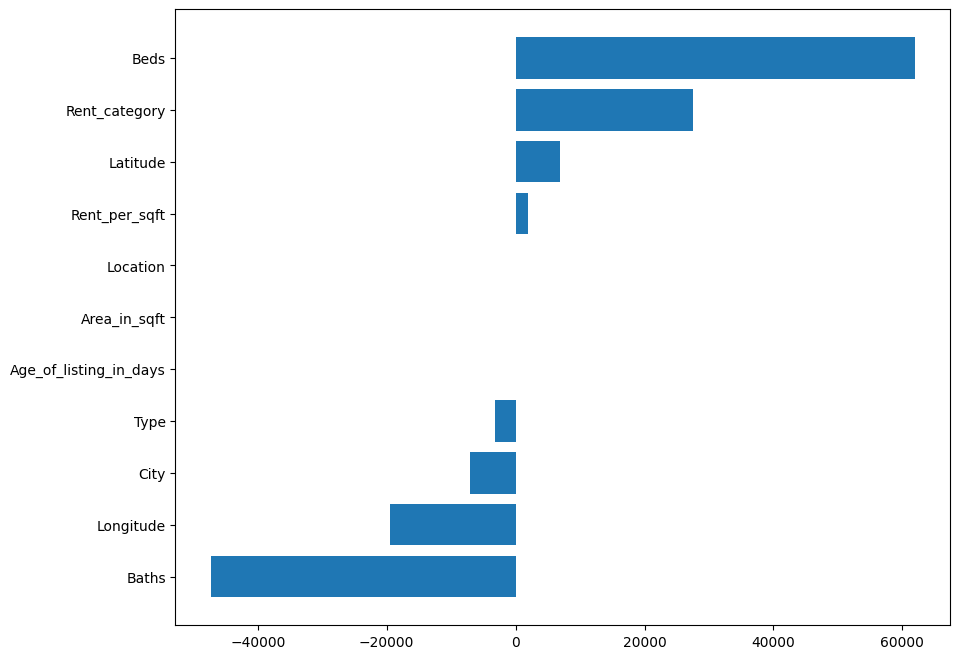

In [46]:
coefs_best = []
names_best = []
zz_best = zip(best_model.coef_, x_1.columns)
zz_best = sorted(zz_best, key=lambda x: x[0])
for c, n in zz_best:
    coefs_best.append(c)
    names_best.append(n)

plt.figure(figsize=(10,8))
plt.barh(range(len(best_model.coef_)), coefs_best, align='center')
plt.yticks(range(len(best_model.coef_)), names_best)

### 6.6 Осуществить фильтрацию признаков с использованием Recursive Feature Elimination.

In [47]:
# create pipeline
rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
model = LinearRegression()
rfe.fit(x_trains,y_trains)



RFE(estimator=LinearRegression(), n_features_to_select=5)

### 6.6 Построить график (barh) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).

([<matplotlib.axis.YTick at 0x1bcd788dd50>,
 [Text(0, 0, 'Rent_per_sqft'),
  Text(0, 1, 'Baths'),
  Text(0, 2, 'Type'),
  Text(0, 3, 'Area_in_sqft'),
  Text(0, 4, 'Beds')])

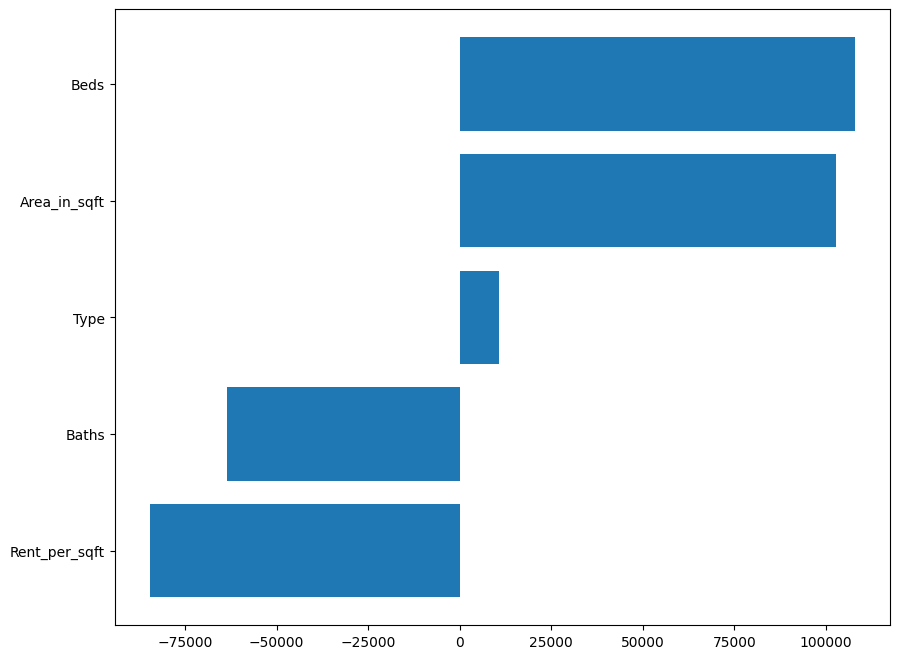

In [48]:
coefs_rfe = []
names_rfe = []
# Getting the coefficients from the estimator used by RFE
estimator_coefs = rfe.estimator_.coef_
zz_rfe = zip(estimator_coefs, x_1.columns)
zz_rfe = sorted(zz_rfe, key=lambda x: x[0])
for c, n in zz_rfe:
    coefs_rfe.append(c)
    names_rfe.append(n)

plt.figure(figsize=(10,8))
plt.barh(range(len(estimator_coefs)), coefs_rfe, align='center')
plt.yticks(range(len(estimator_coefs)), names_rfe)


### 6.7 Вывести значения метрик

In [49]:
rfe_mae_test, rfe_mse_test, rfe_r_two_test = print_metrics(x_tests, y_tests, rfe)

print("Метрики Линейной регресии после фильтрации для тестовой выборки: \n")
print(f"MAE: {rfe_mae_test};\n MSE: {rfe_mse_test}; \n R2: {rfe_r_two_test} \n ")


Метрики Линейной регресии после фильтрации для тестовой выборки: 

MAE: 91064.57689995055;
 MSE: 49775268593.71613; 
 R2: 0.23282233192827662 
 


### 7. Вывод:

#### 7.1 Лучший регрессор без категориальных признаков - Линейная регрессия
#### 7.2 Лучший регрессор с категориальными признаками - Линейная регрессия

### 7.3 все метрики стали хуже 